<a href="https://colab.research.google.com/github/Leo-Kasper/is310-final-project-leo-kasper/blob/main/Notebooks2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
charlist = pd.read_csv('character_list5.csv', encoding='latin-1')

In [4]:
charmap = pd.read_csv('character_mapping.csv', encoding='latin-1')

In [5]:
metadata = pd.read_csv('meta_data7.csv', encoding='latin-1')

In [6]:
charlist

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0
...,...,...,...,...,...
23043,9254,lumiere,1063,m,56.0
23044,9254,maurice,1107,m,71.0
23045,9254,monsieur d'arqu,114,m,58.0
23046,9254,mrs. potts,564,f,66.0


In [7]:
charmap

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466
...,...,...,...,...,...
99385,9254,tt0101414,lumiere,lumiere,nm0001583
99386,9254,tt0101414,maurice,maurice,nm0263591
99387,9254,tt0101414,mrs potts,mrs. potts,nm0001450
99388,9254,tt0101414,townsfolk,NaN,nm0621121


In [8]:
metadata

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340
...,...,...,...,...,...,...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...
1998,3768,tt0421090,Zerophilia,2005,NaN,7647774446763347777777763774163455777777777634...


In [9]:
#The data they contain is pretty self explanatory

In [11]:
charlist.isna().sum()
#2 names are missing, and a lot of ages are missing

script_id                 0
imdb_character_name       2
words                     0
gender                    0
age                    4785
dtype: int64

In [13]:
charmap.isna().sum()
#some chars and closest char names are missing

script_id                                  0
imdb_id                                    0
character_from_script                     53
closest_character_name_from_imdb_match    64
closest_imdb_character_id                  0
dtype: int64

In [16]:
metadata.isna().sum()
#some gross data is missing

script_id       0
imdb_id         0
title           0
year            0
gross         338
lines_data      0
dtype: int64

In [17]:
words_time = pd.merge(metadata, charlist)

In [18]:
words_time = words_time.drop(columns=['script_id', 'imdb_id', 'title', 'gross', 'lines_data', 'imdb_character_name', 'gender', 'age'])

In [19]:
words_time

,year,words
0,2009,316
1,2009,402
2,2009,116
3,2009,134
4,2009,192
...,...,...
23043,2007,395
23044,2007,311
23045,2007,307
23046,2007,145


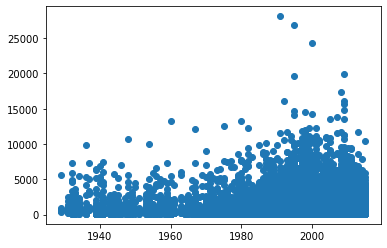

In [22]:
plt.plot(words_time['year'], words_time['words'], 'o')
#Amount of dialogue seems to increase over time but this might be due to things like movie length

In [35]:
gross_words = pd.merge(metadata, charlist)
gross_words = gross_words.drop(columns=['year', 'script_id', 'imdb_id', 'title', 'lines_data', 'imdb_character_name', 'gender', 'age'])

In [37]:
gross_words = gross_words.dropna()

Text(0, 0.5, 'words')

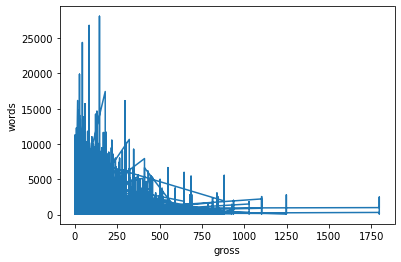

In [47]:
plt.plot(gross_words['gross'], gross_words['words'])
plt.xlabel('gross')
plt.ylabel('words')
#Inverse relationship between words and gross